In [1]:

import pandas as pd  
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
#df =  pd.read_csv('c:\\Users\\IMR\\Onedrive - profertil.com.ar\\MCD\\3 año\\Laboratorio Implementación III\\Modelos\\LaboratorioIII-Bidrec_LSTM\\Dataset\\final_dataset.csv', sep='\t')                      
# Cargar el dataset xx
df = pd.read_csv('C:/Users/Usuario/desktop/vero2/MODELO LEANDRO/final_dataset.csv', sep='\t')

In [ ]:
df.head()
df.info

In [19]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import random
import tensorflow as tf

# Establecer las semillas para numpy, random y tensorflow/keras
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# Crear una función para generar secuencias de tiempo
def create_sequences(data, look_back):
    sequences = []
    for i in range(len(data) - look_back):
        sequence = data[i:(i + look_back)]
        sequences.append(sequence)
    return np.array(sequences)

# Filtrar los registros de los períodos relevantes
df_201907 = df[df['periodo'] == 201907]
df_201908 = df[df['periodo'] == 201908]
df_201909 = df[df['periodo'] == 201909]

# Calcular el promedio de los registros de 201907 y 201909 para cada product_id
promedios = (df_201907.set_index('product_id')['y'] + df_201909.set_index('product_id')['y']) / 2

# Actualizar los registros de 201908 con el promedio calculado
df_201908['y'] = df_201908['product_id'].map(promedios)

# Combinar de nuevo todos los DataFrames para formar el DataFrame final
df_modif = pd.concat([df[df['periodo'] != 201908], df_201908])

# Mostrar el DataFrame modificado
print(df_modif)

# Obtener los IDs únicos de los productos
unique_product_ids = df_modif['product_id'].unique()

# Extraer los valores de tn para diciembre 2019 para cada product_id
#df_dec_2019 = df_modif[df_modif['periodo'] == 201902]
#weights = df_dec_2019.set_index('product_id')['y'].to_dict()

#########################################################################
# Filtrar los registros para diciembre 2019
#df_dec_2019 = df_modif[df_modif['periodo'] == 201912]
# Calcular los pesos como el valor de diciembre 2019 multiplicado por 0.9
#weights = (df_dec_2019.set_index('product_id')['y'] * 0.9).to_dict()

###########################################################
# Filtrar los registros para los periodos necesarios
#df_dec_2018 = df_modif[df_modif['periodo'] == 201812]
#df_feb_2019 = df_modif[df_modif['periodo'] == 201902]
#df_dec_2019 = df_modif[df_modif['periodo'] == 201912]

# Crear un DataFrame para las variaciones
#variations = df_dec_2018.set_index('product_id')['y'] - df_feb_2019.set_index('product_id')['y']

# Crear los pesos basados en las condiciones especificadas
#weights = {}
#for product_id in df_dec_2019['product_id']:
    #if product_id in variations.index:
    #    if variations[product_id] < 0:
    #        weights[product_id] = df_dec_2019[df_dec_2019['product_id'] == product_id]['y'].values[0] * 0.9
    #    else:
    #        weights[product_id] = df_dec_2019[df_dec_2019['product_id'] == product_id]['y'].values[0]
    #else:
    #    weights[product_id] = df_dec_2019[df_dec_2019['product_id'] == product_id]['y'].values[0]


#####################################################################################
# Filtrar los registros para los periodos de diciembre 2018 y diciembre 2019
# df_dec_2018 = df_modif[df_modif['periodo'] == 201812]
# df_dec_2019 = df_modif[df_modif['periodo'] == 201912]

# Filtrar los registros para el año 2018 y 2019 completos
# df_year_2018 = df_modif[df_modif['periodo'].between(201801, 201812)]
# df_year_2019 = df_modif[df_modif['periodo'].between(201901, 201912)]

# Calcular las ventas totales anuales para cada product_id
# annual_sales_2018 = df_year_2018.groupby('product_id')['y'].sum()
# annual_sales_2019 = df_year_2019.groupby('product_id')['y'].sum()

# Crear un DataFrame para las variaciones anuales
# variations = (annual_sales_2019 - annual_sales_2018) / annual_sales_2018

# Crear los pesos basados en las condiciones especificadas
# weights = {}
# for product_id in df_dec_2019['product_id']:
#     if product_id in variations.index:
#         if variations[product_id] < 0:
#             weights[product_id] = df_dec_2019[df_dec_2019['product_id'] == product_id]['y'].values[0] * 0.85
#         else:
#             weights[product_id] = df_dec_2019[df_dec_2019['product_id'] == product_id]['y'].values[0]
#     else:
#         weights[product_id] = df_dec_2019[df_dec_2019['product_id'] == product_id]['y'].values[0]


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# Filtrar los registros para los periodos de diciembre 2018, febrero 2019 y diciembre 2019
df_dec_2018 = df_modif[df_modif['periodo'] == 201812]
df_feb_2019 = df_modif[df_modif['periodo'] == 201902]
df_dec_2019 = df_modif[df_modif['periodo'] == 201912]

# Filtrar los registros para el año 2018 y 2019 completos
df_year_2018 = df_modif[df_modif['periodo'].between(201801, 201812)]
df_year_2019 = df_modif[df_modif['periodo'].between(201901, 201912)]

# Calcular las ventas totales anuales para cada product_id
annual_sales_2018 = df_year_2018.groupby('product_id')['y'].sum()
annual_sales_2019 = df_year_2019.groupby('product_id')['y'].sum()

# Calcular la variación anual
annual_variations = (annual_sales_2019 - annual_sales_2018) / annual_sales_2018

# Crear un DataFrame para las variaciones entre diciembre 2018 y febrero 2019
monthly_variations = df_dec_2018.set_index('product_id')['y'] - df_feb_2019.set_index('product_id')['y']

# Crear los pesos basados en las condiciones especificadas
weights = {}
for product_id in df_dec_2019['product_id']:
    if product_id in annual_variations.index:
        if annual_variations[product_id] < 0:
            if product_id in monthly_variations.index and monthly_variations[product_id] < 0:
                weights[product_id] = df_dec_2019[df_dec_2019['product_id'] == product_id]['y'].values[0] * 3
            else:
                weights[product_id] = df_dec_2019[df_dec_2019['product_id'] == product_id]['y'].values[0] * 1.5
        else:
            weights[product_id] = df_dec_2019[df_dec_2019['product_id'] == product_id]['y'].values[0]
    else:
        weights[product_id] = df_dec_2019[df_dec_2019['product_id'] == product_id]['y'].values[0]

# Mostrar los pesos calculados
print(weights)






# Agrupar productos por histórico de toneladas
historical_data = []
for product_id in unique_product_ids:
    product_data = df_modif[df_modif['product_id'] == product_id]
    produccion = product_data['y'].values.reshape(-1, 1)
    
    # Imputar valores NaN con la media del producto
    imputer = SimpleImputer(strategy='mean')
    produccion_imputed = imputer.fit_transform(produccion)
    
    historical_data.append(produccion_imputed.flatten())

# Asegurarse de que todas las series de tiempo tengan la misma longitud
max_length = max(map(len, historical_data))
historical_data = np.array([np.pad(h, (0, max_length - len(h)), 'constant') for h in historical_data])

# Usar KMeans para agrupar productos en 5 grupos 
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # Establecer n_init explícitamente
clusters = kmeans.fit_predict(historical_data)

# Añadir la información de clusters al DataFrame original
df_modif['cluster'] = df_modif['product_id'].map(dict(zip(unique_product_ids, clusters)))

# Lista para almacenar las predicciones
predictions = []

# Lista para almacenar los productos sin predicción
no_predictions = []

# Loop a través de cada cluster
for cluster in range(n_clusters):
    # Seleccionar los productos en el cluster actual
    cluster_data = df_modif[df_modif['cluster'] == cluster]
    
    # Lista para almacenar los datos normalizados por producto
    normalized_data = []
    scalers = {}
    product_ids_in_cluster = cluster_data['product_id'].unique()
    
    for product_id in product_ids_in_cluster:
        product_data = cluster_data[cluster_data['product_id'] == product_id]
        
        # Normalizar la producción para escalar de manera consistente
        scaler = StandardScaler()
        produccion_normalizada = scaler.fit_transform(product_data['y'].values.reshape(-1, 1))
        
        normalized_data.append(produccion_normalizada)
        scalers[product_id] = scaler

    # Crear secuencias para el cluster
    look_back = 12  # Número de meses pasados a considerar
    
    cluster_sequences = []
    for data in normalized_data:
        sequences = create_sequences(data, look_back)
        if len(sequences) > 0:
            cluster_sequences.extend(sequences)
        
    cluster_sequences = np.array(cluster_sequences)

    if len(cluster_sequences) == 0:
        continue  # Saltar al siguiente cluster si no hay secuencias

    # Separar las características (X) y los valores objetivo (y) para el entrenamiento
    X = cluster_sequences[:, :-1]  # Todas las características excepto el último mes (objetivo)
    y = cluster_sequences[:, -1]   # Último mes (objetivo)
    
    # Reshape para que sea compatible con LSTM
    X = X.reshape((X.shape[0], X.shape[1], 1))
    
    # Crear el array de pesos utilizando los valores de tn para diciembre 2019
    sample_weights = np.array([weights[product_id] for product_id in product_ids_in_cluster for _ in range(len(create_sequences(normalized_data[list(product_ids_in_cluster).index(product_id)], look_back)))])

    # Definir el modelo LSTM bidireccional para el cluster
    model = Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X.shape[1], X.shape[2])))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(1))  # Capa de salida con 1 neurona (predicción del mes dos)
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Entrenar el modelo
    model.fit(X, y, epochs=15, batch_size=1, sample_weight=sample_weights, verbose=0)
    
    # Realizar predicciones para cada producto en el cluster
    for product_id in product_ids_in_cluster:
        product_data = cluster_data[cluster_data['product_id'] == product_id]
        produccion_normalizada = normalized_data[list(product_ids_in_cluster).index(product_id)]
        
        # Crear secuencias para el producto actual
        sequences = create_sequences(produccion_normalizada, look_back)
        if len(sequences) == 0:
            no_predictions.append({'product_id': product_id, 'reason': 'Insufficient data for sequence creation'})
            continue  # Saltar al siguiente producto si no hay secuencias

        X_product = sequences[:, :-1]  # Todas las características excepto el último mes (objetivo)
        X_product = X_product.reshape((X_product.shape[0], X_product.shape[1], 1))
        
        # Realizar la predicción del próximo mes (periodo 1)
        primera_prediccion_normalizada = model.predict(np.array([X_product[-1]]))
        
        # Añadir la predicción del próximo mes a la secuencia para predecir el mes siguiente (periodo 2)
        nueva_secuencia = np.append(X_product[-1][1:], [[primera_prediccion_normalizada.flatten()[0]]], axis=0)
        nueva_secuencia = nueva_secuencia.reshape((1, nueva_secuencia.shape[0], 1))
        
        # Realizar la predicción del mes dos (periodo 2)
        segunda_prediccion_normalizada = model.predict(nueva_secuencia)
        segunda_prediccion = scalers[product_id].inverse_transform(segunda_prediccion_normalizada.reshape(-1, 1))
        
        # Almacenar el ID del producto y la predicción en la lista de predicciones
        predictions.append({'product_id': product_id, 'prediccion_produccion': segunda_prediccion.flatten()[0]})

# Convertir la lista de predicciones en un DataFrame
predictions_df = pd.DataFrame(predictions)

# Convertir la lista de productos sin predicción en un DataFrame
no_predictions_df = pd.DataFrame(no_predictions)

# Calcular el promedio de los últimos 12 meses para los productos sin predicción
final_dataset = df_modif  # Asegúrate de que 'final_dataset' esté definido o reemplázalo por el nombre correcto

for index, row in no_predictions_df.iterrows():
    product_id = row['product_id']
    product_data = final_dataset[final_dataset['product_id'] == product_id]
    if len(product_data) >= 12:
        promedio = product_data['y'].iloc[-12:].mean()
    else:
        promedio = product_data['y'].mean()  # Si no hay suficientes datos, usar el promedio general
    predictions.append({'product_id': product_id, 'prediccion_produccion': promedio})

# Convertir la lista de predicciones en un DataFrame
final_predictions_df = pd.DataFrame(predictions)

# Guardar el DataFrame como un archivo CSV
final_predictions_df.to_csv('C:/Users/Usuario/desktop/vero2/MODELO LEANDRO/predicciones_v16s.csv', index=False)

# Informar el número de productos sin predicción
print(f"Number of products without prediction: {len(no_predictions)}")


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2624\741166645.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_201908['y'] = df_201908['product_id'].map(promedios)


       periodo  product_id  plan_precios_cuidados  cust_request_qty  \
0       201701       20001                      0               479   
1       201702       20001                      0               432   
2       201703       20001                      0               509   
3       201704       20001                      0               279   
4       201705       20001                      0               701   
...        ...         ...                    ...               ...   
22288   201908       21110                      0                93   
22293   201908       21129                      0                49   
22298   201908       21144                      0                69   
22303   201908       21146                      0                70   
22308   201908       21154                      0                70   

       cust_request_tn           y   cat1         cat2     cat3     brand  \
0            937.72717   934.77222     HC  ROPA LAVADO  Liquido     AR

In [20]:
product_id_to_display = 20001
predictions_for_product = final_predictions_df.loc[final_predictions_df['product_id'] == product_id_to_display]

# Mostrar las predicciones para el product_id específico
display(predictions_for_product)


,product_id,prediccion_produccion
566,20001,1577.36499


In [15]:
final_predictions_df.to_csv('C:/Users/Usuario/desktop/vero2/MODELO LEANDRO/predicciones_v2.csv', index=False)


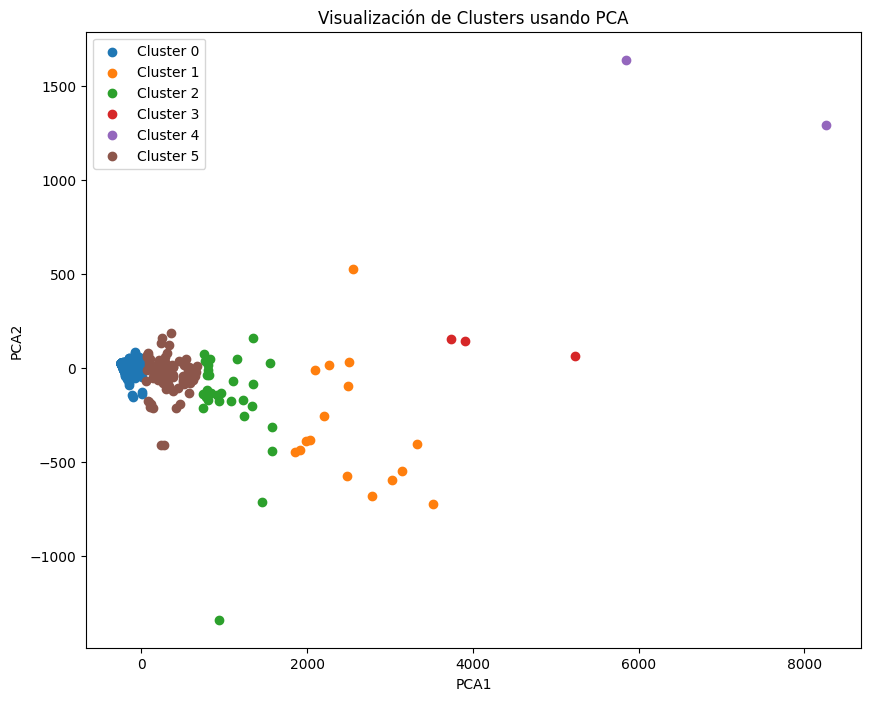

Cluster 0:
[20152, 20153, 20155, 20157, 20162, 20166, 20167, 20175, 20176, 20177, 20179, 20180, 20181, 20182, 20183, 20184, 20187, 20188, 20189, 20192, 20193, 20196, 20197, 20198, 20200, 20201, 20205, 20206, 20207, 20208, 20209, 20211, 20212, 20215, 20216, 20219, 20220, 20222, 20224, 20225, 20226, 20227, 20228, 20230, 20231, 20232, 20233, 20234, 20235, 20238, 20239, 20240, 20241, 20242, 20244, 20246, 20249, 20251, 20252, 20253, 20254, 20255, 20256, 20259, 20263, 20264, 20265, 20267, 20268, 20269, 20270, 20271, 20272, 20273, 20275, 20276, 20277, 20278, 20280, 20281, 20282, 20283, 20284, 20285, 20288, 20289, 20290, 20291, 20292, 20295, 20296, 20299, 20300, 20301, 20302, 20303, 20304, 20305, 20307, 20309, 20310, 20311, 20313, 20314, 20315, 20316, 20317, 20320, 20321, 20322, 20324, 20325, 20326, 20327, 20328, 20329, 20330, 20332, 20335, 20336, 20338, 20341, 20342, 20346, 20349, 20350, 20352, 20353, 20354, 20356, 20357, 20358, 20359, 20361, 20362, 20365, 20366, 20367, 20372, 20375, 20379, 2

In [32]:
#Grafico con 6 cluster
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Usar PCA para reducir la dimensionalidad de los datos históricos
pca = PCA(n_components=2)
historical_data_pca = pca.fit_transform(historical_data)

# Crear un DataFrame para facilitar la visualización
pca_df = pd.DataFrame(historical_data_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = clusters
pca_df['product_id'] = unique_product_ids

# Visualizar los clusters
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualización de Clusters usando PCA')
plt.legend()
plt.show()

# Mostrar qué productos están en cada cluster
for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")
    cluster_products = pca_df[pca_df['cluster'] == cluster]['product_id']
    print(cluster_products.tolist())
    print()


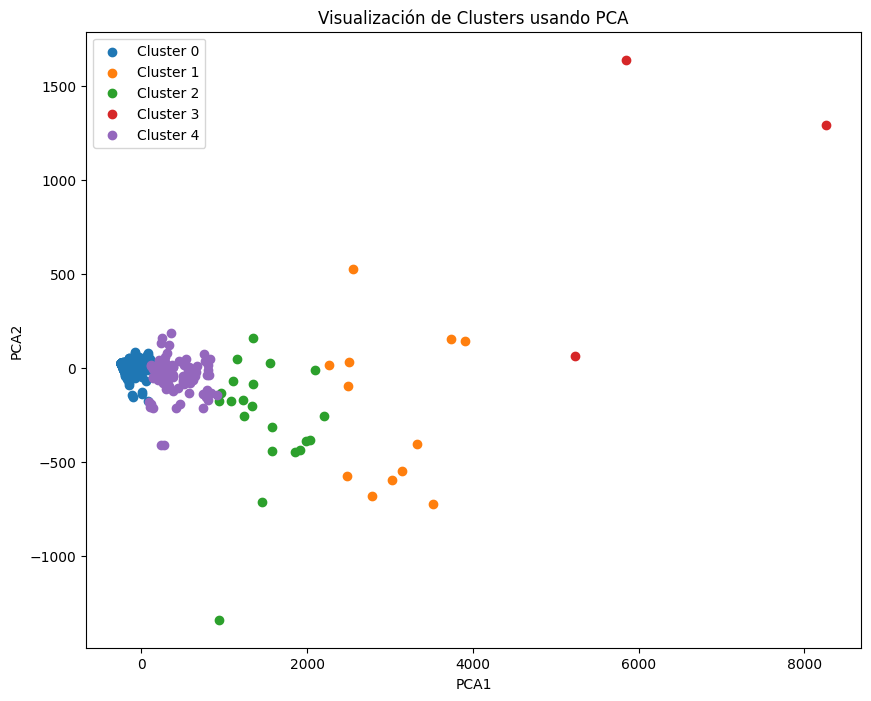

Cluster 0:
[20142, 20144, 20145, 20148, 20152, 20153, 20155, 20157, 20158, 20160, 20161, 20162, 20166, 20167, 20168, 20175, 20176, 20177, 20179, 20180, 20181, 20182, 20183, 20184, 20187, 20188, 20189, 20192, 20193, 20196, 20197, 20198, 20200, 20201, 20205, 20206, 20207, 20208, 20209, 20211, 20212, 20215, 20216, 20219, 20220, 20222, 20224, 20225, 20226, 20227, 20228, 20230, 20231, 20232, 20233, 20234, 20235, 20238, 20239, 20240, 20241, 20242, 20244, 20246, 20249, 20251, 20252, 20253, 20254, 20255, 20256, 20259, 20263, 20264, 20265, 20267, 20268, 20269, 20270, 20271, 20272, 20273, 20275, 20276, 20277, 20278, 20280, 20281, 20282, 20283, 20284, 20285, 20288, 20289, 20290, 20291, 20292, 20295, 20296, 20299, 20300, 20301, 20302, 20303, 20304, 20305, 20307, 20309, 20310, 20311, 20313, 20314, 20315, 20316, 20317, 20320, 20321, 20322, 20324, 20325, 20326, 20327, 20328, 20329, 20330, 20332, 20335, 20336, 20338, 20341, 20342, 20346, 20349, 20350, 20352, 20353, 20354, 20356, 20357, 20358, 20359, 2

In [27]:
#Grafico con 5 cluster
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Usar PCA para reducir la dimensionalidad de los datos históricos
pca = PCA(n_components=2)
historical_data_pca = pca.fit_transform(historical_data)

# Crear un DataFrame para facilitar la visualización
pca_df = pd.DataFrame(historical_data_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = clusters
pca_df['product_id'] = unique_product_ids

# Visualizar los clusters
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualización de Clusters usando PCA')
plt.legend()
plt.show()

# Mostrar qué productos están en cada cluster
for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")
    cluster_products = pca_df[pca_df['cluster'] == cluster]['product_id']
    print(cluster_products.tolist())
    print()


In [38]:
#df = pd.read_csv('c:\\Users\\IMR\\Onedrive - profertil.com.ar\\MCD\\3 año\\Laboratorio Implementación III\\Modelos\\LaboratorioIII-Bidrec_LSTM\\Dataset\\final_dataset.csv', sep='\t')                      
# Cargar el dataset
df = pd.read_csv('C:/Users/Usuario/desktop/vero2/MODELO LEANDRO/final_dataset.csv', sep='\t')

In [26]:
product_id_to_display = 20001
predictions_for_product = final_predictions_df.loc[final_predictions_df['product_id'] == product_id_to_display]

# Mostrar las predicciones para el product_id específico
display(predictions_for_product)

,product_id,prediccion_produccion
566,20001,1302.873779
